Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [135]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [136]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [137]:
# Already Wrangled Project 2 dataset
df = pd.read_csv('https://raw.githubusercontent.com/John-G-Thomas/Projects/master/Project2DF.csv')
df.set_index(pd.to_datetime(df['Datetime']), inplace = True)
print(df.shape)
df.head()

(3148, 12)


,Datetime,LandAverageTemperatureUncertainty,UpperBounds,LowerBounds,month,year,Average_Temperature,Yearly_SMA,Decade_SMA,Semicentennial_SMA,Centurie,Global_Warming
Datetime,,,,,,,,,,,,
1750-01-01,1750-01-01,3.574,6.608,-0.540,1,1750,3.034,NaN,NaN,NaN,NaN,0
1750-02-01,1750-02-01,3.702,6.785,-0.619,2,1750,3.083,NaN,NaN,NaN,NaN,0
1750-03-01,1750-03-01,3.076,8.702,2.550,3,1750,5.626,NaN,NaN,NaN,NaN,0
1750-04-01,1750-04-01,2.451,10.941,6.039,4,1750,8.490,NaN,NaN,NaN,NaN,1
1750-05-01,1750-05-01,2.072,13.645,9.501,5,1750,11.573,NaN,NaN,NaN,NaN,1


In [138]:
morefeatures = pd.read_csv('https://pkgstore.datahub.io/core/co2-fossil-global/global_csv/data/09015539c2fc32bb3c4afead7df461b5/global_csv.csv')
morefeatures.fillna(0, inplace=True)
print(morefeatures.shape)
morefeatures.head(10)

(260, 8)


,Year,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,0.0
1,1752,3,0,0,3,0,0,0.0
2,1753,3,0,0,3,0,0,0.0
3,1754,3,0,0,3,0,0,0.0
4,1755,3,0,0,3,0,0,0.0
5,1756,3,0,0,3,0,0,0.0
6,1757,3,0,0,3,0,0,0.0
7,1758,3,0,0,3,0,0,0.0
8,1759,3,0,0,3,0,0,0.0
9,1760,3,0,0,3,0,0,0.0


In [139]:
morefeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         260 non-null    int64  
 1   Total        260 non-null    int64  
 2   Gas Fuel     260 non-null    int64  
 3   Liquid Fuel  260 non-null    int64  
 4   Solid Fuel   260 non-null    int64  
 5   Cement       260 non-null    int64  
 6   Gas Flaring  260 non-null    int64  
 7   Per Capita   260 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 16.4 KB


In [140]:
df=df.rename(columns={'year': 'Year'})
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3148 entries, 1750-01-01 to 2015-12-01
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Datetime                           3148 non-null   object 
 1   LandAverageTemperatureUncertainty  3148 non-null   float64
 2   UpperBounds                        3148 non-null   float64
 3   LowerBounds                        3148 non-null   float64
 4   month                              3148 non-null   int64  
 5   Year                               3148 non-null   int64  
 6   Average_Temperature                3148 non-null   float64
 7   Yearly_SMA                         3137 non-null   float64
 8   Decade_SMA                         3029 non-null   float64
 9   Semicentennial_SMA                 2549 non-null   float64
 10  Centurie                           1949 non-null   float64
 11  Global_Warming                     314

In [141]:
#morefeatures['Decade_SMA_Solid_Fuel'] = morefeatures[['Solid Fuel']].rolling(window=10).mean() #Total
#morefeatures['Decade_SMA_Gas_Fuel'] = morefeatures[['Gas Fuel']].rolling(window=10).mean()
#morefeatures['Decade_SMA_Cement'] = morefeatures[['Cement']].rolling(window=12).mean()
#morefeatures['Decade_SMA_Gas_Flaring'] = morefeatures[['Gas Flaring']].rolling(window=10).mean()
#morefeatures['Decade_SMA_Per_Capita'] = morefeatures[['Per Capita']].rolling(window=10).mean()
#morefeatures['Decade_SMA_Liquid_Fuel'] = morefeatures[['Liquid Fuel']].rolling(window=10).mean()
#morefeatures['Decade_SMA_CarbonTotal'] = morefeatures[['Total']].rolling(window=10).mean()
#print(morefeatures.shape)
#morefeatures.tail(20)

- Mearge Two DataFrames

In [142]:
X = pd.merge(df, morefeatures, how='inner')
X.set_index(pd.to_datetime(X['Datetime']), inplace = True)
X.drop('Datetime', axis=1, inplace=True)
print(X.shape)
X.tail(10)

(3079, 18)


,LandAverageTemperatureUncertainty,UpperBounds,LowerBounds,month,Year,Average_Temperature,Yearly_SMA,Decade_SMA,Semicentennial_SMA,Centurie,Global_Warming,Total,Gas Fuel,Liquid Fuel,Solid Fuel,Cement,Gas Flaring,Per Capita
Datetime,,,,,,,,,,,,,,,,,,
2010-03-01,0.057,6.795,6.681,3,2010,6.738,9.589167,9.506567,8.977185,8.765650,0,9167,1702,3114,3842,450,59,1.33
2010-04-01,0.087,9.758,9.584,4,2010,9.671,9.614500,9.507558,8.979748,8.766955,1,9167,1702,3114,3842,450,59,1.33
2010-05-01,0.078,12.484,12.328,5,2010,12.406,9.639000,9.511992,8.982305,8.768122,1,9167,1702,3114,3842,450,59,1.33
2010-06-01,0.086,14.507,14.335,6,2010,14.421,9.657333,9.515000,8.983867,8.769181,1,9167,1702,3114,3842,450,59,1.33
2010-07-01,0.090,15.303,15.123,7,2010,15.213,9.655833,9.518042,8.985558,8.769959,1,9167,1702,3114,3842,450,59,1.33
2010-08-01,0.112,14.880,14.656,8,2010,14.768,9.665250,9.520117,8.987130,8.770868,1,9167,1702,3114,3842,450,59,1.33
2010-09-01,0.065,12.928,12.798,9,2010,12.863,9.641083,9.522750,8.988410,8.771810,1,9167,1702,3114,3842,450,59,1.33
2010-10-01,0.070,10.512,10.372,10,2010,10.442,9.666583,9.530717,8.989985,8.773007,1,9167,1702,3114,3842,450,59,1.33
2010-11-01,0.102,7.589,7.385,11,2010,7.487,9.704583,9.540508,8.992750,8.774814,0,9167,1702,3114,3842,450,59,1.33


In [143]:
X['Yearly_SMA_Solid_Fuel'] = X[['Solid Fuel']].rolling(window=12).mean()
X['Yearly_SMA_Gas_Fuel'] = X[['Gas Fuel']].rolling(window=12).mean()
X['Yearly_SMA_Cement'] = X[['Cement']].rolling(window=12).mean()
X['Yearly_SMA_Gas_Flaring'] = X[['Gas Flaring']].rolling(window=12).mean()
X['Yearly_SMA_Per_Capita'] = X[['Per Capita']].rolling(window=12).mean()
X['Yearly_SMA_Liquid_Fuel'] = X[['Liquid Fuel']].rolling(window=12).mean()
X['Yearly_SMA_CarbonTotal'] = X[['Total']].rolling(window=12).mean()
X.drop('Decade_SMA', axis=1, inplace=True)
X.drop('Semicentennial_SMA', axis=1, inplace=True)
X.drop('Centurie', axis=1, inplace=True)
X.dropna(subset=['Yearly_SMA_CarbonTotal'], inplace=True)

In [147]:
X.drop('Total', axis=1, inplace=True)
X.drop('Gas Fuel', axis=1, inplace=True)
X.drop('Liquid Fuel', axis=1, inplace=True)
X.drop('Solid Fuel', axis=1, inplace=True)
X.drop('Gas Flaring', axis=1, inplace=True)
X.drop('Per Capita', axis=1, inplace=True)

In [150]:
X.drop('Cement', axis=1, inplace=True)

In [152]:
X.isnull().sum()

LandAverageTemperatureUncertainty    0
UpperBounds                          0
LowerBounds                          0
month                                0
Year                                 0
Average_Temperature                  0
Yearly_SMA                           0
Global_Warming                       0
Yearly_SMA_Solid_Fuel                0
Yearly_SMA_Gas_Fuel                  0
Yearly_SMA_Cement                    0
Yearly_SMA_Gas_Flaring               0
Yearly_SMA_Per_Capita                0
Yearly_SMA_Liquid_Fuel               0
Yearly_SMA_CarbonTotal               0
dtype: int64

### 1) Continue to clean and explore your data. Make exploratory visualizations.

In [151]:
print(X.shape)
X.head(10)

(3068, 15)


,LandAverageTemperatureUncertainty,UpperBounds,LowerBounds,month,Year,Average_Temperature,Yearly_SMA,Global_Warming,Yearly_SMA_Solid_Fuel,Yearly_SMA_Gas_Fuel,Yearly_SMA_Cement,Yearly_SMA_Gas_Flaring,Yearly_SMA_Per_Capita,Yearly_SMA_Liquid_Fuel,Yearly_SMA_CarbonTotal
Datetime,,,,,,,,,,,,,,,
1752-11-01,2.747,10.082,4.588,11,1752,7.335,7.118833,0,3.0,0.0,0.0,0.0,0.0,0.0,3.0
1752-12-01,2.982,8.068,2.104,12,1752,5.086,7.334750,0,3.0,0.0,0.0,0.0,0.0,0.0,3.0
1753-01-01,3.478,5.517,-1.439,1,1753,2.039,7.424417,0,3.0,0.0,0.0,0.0,0.0,0.0,3.0
1753-02-01,6.341,7.056,-5.626,2,1753,0.715,7.000667,0,3.0,0.0,0.0,0.0,0.0,0.0,3.0
1753-03-01,2.929,8.353,2.495,3,1753,5.424,6.813500,0,3.0,0.0,0.0,0.0,0.0,0.0,3.0
1753-04-01,3.177,11.449,5.095,4,1753,8.272,6.350583,0,3.0,0.0,0.0,0.0,0.0,0.0,3.0
1753-05-01,3.111,15.297,9.075,5,1753,12.186,6.165667,1,3.0,0.0,0.0,0.0,0.0,0.0,3.0
1753-06-01,2.590,17.175,11.995,6,1753,14.585,6.491667,1,3.0,0.0,0.0,0.0,0.0,0.0,3.0
1753-07-01,1.929,17.021,13.163,7,1753,15.092,7.720333,1,3.0,0.0,0.0,0.0,0.0,0.0,3.0


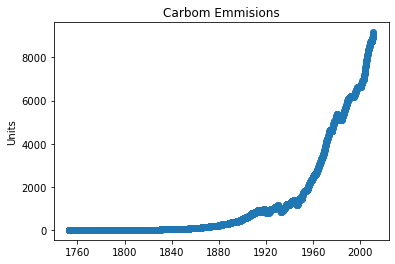

In [153]:
plt.plot(X['Yearly_SMA_CarbonTotal'], 'o')
plt.title('Carbom Emmisions')
plt.ylabel('Units');
plt.show();

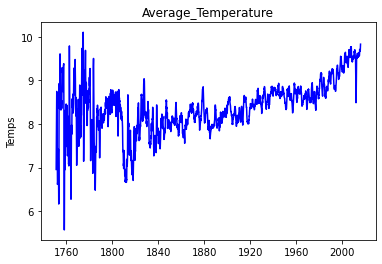

In [156]:
plt.plot(df['Yearly_SMA'], 'b')
plt.title('Average_Temperature')
plt.ylabel('Temps');
plt.show();

### 2) Fit a model. Does it beat your baseline?

### 3) Try xgboost.

### 4) Get your model's permutation importances.